## Exercise 1
You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

- Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [125]:
import pandas as pd

df = pd.read_csv('../data/housing-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


In [126]:
print(df.head(), '\n')
print(df.tail())

   sqft  bdrms  age   price
0  2104      3   70  399900
1  1600      3   28  329900
2  2400      3   44  369000
3  1416      2   49  232000
4  3000      4   75  539900 

    sqft  bdrms  age   price
42  2567      4   57  314000
43  1200      3   76  299000
44   852      2   70  179900
45  1852      4   64  299900
46  1203      3   11  239500


In [127]:
df.isnull().sum()

sqft     0
bdrms    0
age      0
price    0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE6C95B048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001CE6DAE79E8>], dtype=object)

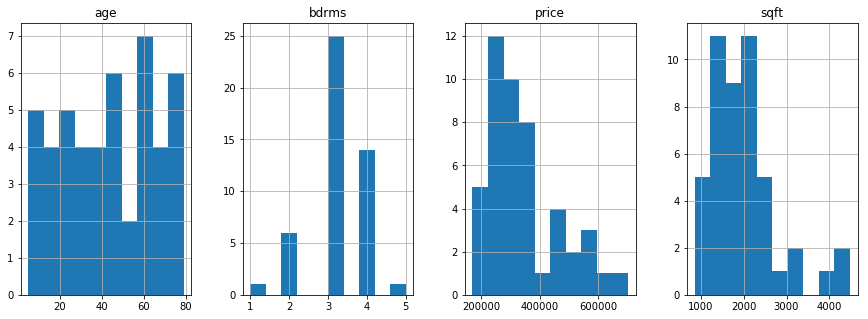

In [128]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1,4,figsize=(15, 5))
df.hist(ax=axis)

In [129]:
X = df[['age', 'bdrms', 'sqft']]
Y = df['price'].values

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [140]:
# Data standardization
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(X)
Y = scalar.fit_transform(Y.reshape(-1, 1))

# print(type(X))
# print(type(Y))

# <class 'numpy.ndarray'>
# <class 'numpy.ndarray'>

# print(X.shape)
# print(Y.shape)

# (47, 3)
# (47, 1)

In [131]:
Y = Y.flatten()

# print(Y.shape)
# (47,)

In [132]:
# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# (37, 3)
# (37,)
# (10, 3)
# (10,)

In [133]:
from keras.layers import Input, Dense
from keras.models import Model

In [134]:
K = 1
visible = Input(shape=(3,))
output = Dense(K)(visible)

model = Model(inputs=visible, outputs=output)

In [135]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.compile(
    loss = 'mean_squared_error',
    optimizer = 'adam',
)

In [137]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 500)

Train on 37 samples, validate on 10 samples
Epoch 1/500
37/37 [==============================] - 0s - loss: 0.6605 - val_loss: 1.0047
Epoch 2/500
37/37 [==============================] - 0s - loss: 0.6569 - val_loss: 0.9966
Epoch 3/500
37/37 [==============================] - 0s - loss: 0.6535 - val_loss: 0.9891
Epoch 4/500
37/37 [==============================] - 0s - loss: 0.6502 - val_loss: 0.9819
Epoch 5/500
37/37 [==============================] - 0s - loss: 0.6471 - val_loss: 0.9755
Epoch 6/500
37/37 [==============================] - 0s - loss: 0.6443 - val_loss: 0.9701
Epoch 7/500
37/37 [==============================] - 0s - loss: 0.6413 - val_loss: 0.9649
Epoch 8/500
37/37 [==============================] - 0s - loss: 0.6389 - val_loss: 0.9593
Epoch 9/500
37/37 [==============================] - 0s - loss: 0.6363 - val_loss: 0.9533
Epoch 10/500
37/37 [==============================] - 0s - loss: 0.6337 - val_loss: 0.9469
Epoch 11/500
37/37 [==============================] - 0

37/37 [==============================] - 0s - loss: 0.4761 - val_loss: 0.6187
Epoch 91/500
37/37 [==============================] - 0s - loss: 0.4746 - val_loss: 0.6158
Epoch 92/500
37/37 [==============================] - 0s - loss: 0.4732 - val_loss: 0.6126
Epoch 93/500
37/37 [==============================] - 0s - loss: 0.4719 - val_loss: 0.6096
Epoch 94/500
37/37 [==============================] - 0s - loss: 0.4702 - val_loss: 0.6067
Epoch 95/500
37/37 [==============================] - 0s - loss: 0.4689 - val_loss: 0.6038
Epoch 96/500
37/37 [==============================] - 0s - loss: 0.4673 - val_loss: 0.6005
Epoch 97/500
37/37 [==============================] - 0s - loss: 0.4661 - val_loss: 0.5970
Epoch 98/500
37/37 [==============================] - 0s - loss: 0.4646 - val_loss: 0.5938
Epoch 99/500
37/37 [==============================] - 0s - loss: 0.4631 - val_loss: 0.5908
Epoch 100/500
37/37 [==============================] - 0s - loss: 0.4618 - val_loss: 0.5879
Epoch 101/5

37/37 [==============================] - 0s - loss: 0.3837 - val_loss: 0.4397
Epoch 180/500
37/37 [==============================] - 0s - loss: 0.3830 - val_loss: 0.4388
Epoch 181/500
37/37 [==============================] - 0s - loss: 0.3823 - val_loss: 0.4379
Epoch 182/500
37/37 [==============================] - 0s - loss: 0.3816 - val_loss: 0.4369
Epoch 183/500
37/37 [==============================] - 0s - loss: 0.3808 - val_loss: 0.4357
Epoch 184/500
37/37 [==============================] - 0s - loss: 0.3802 - val_loss: 0.4347
Epoch 185/500
37/37 [==============================] - 0s - loss: 0.3794 - val_loss: 0.4338
Epoch 186/500
37/37 [==============================] - 0s - loss: 0.3787 - val_loss: 0.4329
Epoch 187/500
37/37 [==============================] - 0s - loss: 0.3780 - val_loss: 0.4320
Epoch 188/500
37/37 [==============================] - 0s - loss: 0.3774 - val_loss: 0.4310
Epoch 189/500
37/37 [==============================] - 0s - loss: 0.3767 - val_loss: 0.4302
Ep

37/37 [==============================] - 0s - loss: 0.3322 - val_loss: 0.3626
Epoch 269/500
37/37 [==============================] - 0s - loss: 0.3318 - val_loss: 0.3618
Epoch 270/500
37/37 [==============================] - 0s - loss: 0.3311 - val_loss: 0.3610
Epoch 271/500
37/37 [==============================] - 0s - loss: 0.3307 - val_loss: 0.3601
Epoch 272/500
37/37 [==============================] - 0s - loss: 0.3301 - val_loss: 0.3592
Epoch 273/500
37/37 [==============================] - 0s - loss: 0.3296 - val_loss: 0.3585
Epoch 274/500
37/37 [==============================] - 0s - loss: 0.3292 - val_loss: 0.3578
Epoch 275/500
37/37 [==============================] - 0s - loss: 0.3286 - val_loss: 0.3571
Epoch 276/500
37/37 [==============================] - 0s - loss: 0.3284 - val_loss: 0.3563
Epoch 277/500
37/37 [==============================] - 0s - loss: 0.3277 - val_loss: 0.3555
Epoch 278/500
37/37 [==============================] - 0s - loss: 0.3273 - val_loss: 0.3546
Ep

37/37 [==============================] - 0s - loss: 0.3028 - val_loss: 0.3166
Epoch 358/500
37/37 [==============================] - 0s - loss: 0.3027 - val_loss: 0.3162
Epoch 359/500
37/37 [==============================] - 0s - loss: 0.3025 - val_loss: 0.3159
Epoch 360/500
37/37 [==============================] - 0s - loss: 0.3023 - val_loss: 0.3154
Epoch 361/500
37/37 [==============================] - 0s - loss: 0.3021 - val_loss: 0.3149
Epoch 362/500
37/37 [==============================] - 0s - loss: 0.3018 - val_loss: 0.3144
Epoch 363/500
37/37 [==============================] - 0s - loss: 0.3017 - val_loss: 0.3140
Epoch 364/500
37/37 [==============================] - 0s - loss: 0.3015 - val_loss: 0.3136
Epoch 365/500
37/37 [==============================] - 0s - loss: 0.3012 - val_loss: 0.3133
Epoch 366/500
37/37 [==============================] - 0s - loss: 0.3011 - val_loss: 0.3129
Epoch 367/500
37/37 [==============================] - 0s - loss: 0.3009 - val_loss: 0.3126
Ep

37/37 [==============================] - 0s - loss: 0.2874 - val_loss: 0.2949
Epoch 447/500
37/37 [==============================] - 0s - loss: 0.2873 - val_loss: 0.2948
Epoch 448/500
37/37 [==============================] - 0s - loss: 0.2871 - val_loss: 0.2946
Epoch 449/500
37/37 [==============================] - 0s - loss: 0.2870 - val_loss: 0.2945
Epoch 450/500
37/37 [==============================] - 0s - loss: 0.2869 - val_loss: 0.2944
Epoch 451/500
37/37 [==============================] - 0s - loss: 0.2868 - val_loss: 0.2942
Epoch 452/500
37/37 [==============================] - 0s - loss: 0.2867 - val_loss: 0.2941
Epoch 453/500
37/37 [==============================] - 0s - loss: 0.2866 - val_loss: 0.2940
Epoch 454/500
37/37 [==============================] - 0s - loss: 0.2865 - val_loss: 0.2938
Epoch 455/500
37/37 [==============================] - 0s - loss: 0.2863 - val_loss: 0.2936
Epoch 456/500
37/37 [==============================] - 0s - loss: 0.2862 - val_loss: 0.2935
Ep

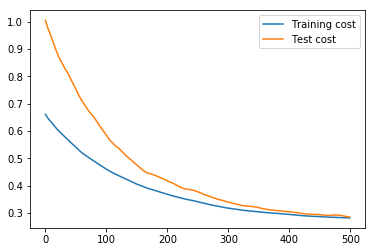

In [138]:
plt.plot(r.history['loss'], label='Training cost')
plt.plot(r.history['val_loss'], label='Test cost')
plt.legend()
plt.show()

In [139]:
from sklearn.metrics import r2_score

Yhat = model.predict(X_test).flatten()
# Yhat.shape
# (10,)

r2_score(y_test, Yhat)

0.82706139917403232